In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from intent_classification_helper import *

In [ ]:
atis_train = pd.read_csv('/content/drive/MyDrive/nlp_datasets/ATIS dataset/atis_intents_train.csv', error_bad_lines=False, 
                   engine='python', encoding='utf-8', names=['intent', 'message'])
atis_test = pd.read_csv('/content/drive/MyDrive/nlp_datasets/ATIS dataset/atis_intents_test.csv', error_bad_lines=False, 
                   engine='python', encoding='utf-8', names=['intent', 'message'])
assert(set(atis_train['intent']) == set(atis_test['intent']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
atis_train['intent'].value_counts()

atis_flight            3666
atis_airfare            423
atis_ground_service     255
atis_airline            157
atis_abbreviation       147
atis_aircraft            81
atis_flight_time         54
atis_quantity            51
Name: intent, dtype: int64

In [ ]:
atis_train = balance_class(atis_train, 'message', 'intent')

In [ ]:
atis_train['intent'].value_counts()

atis_flight            3666
atis_flight_time       3666
atis_airfare           3666
atis_aircraft          3666
atis_ground_service    3666
atis_airline           3666
atis_abbreviation      3666
atis_quantity          3666
Name: intent, dtype: int64

In [ ]:
# encode label
le = LabelEncoder()
atis_train['intent'] = le.fit_transform(atis_train['intent'])
atis_test['intent'] = le.fit_transform(atis_test['intent'])

onehot_encoder = OneHotEncoder()
y_train = onehot_encoder.fit_transform(atis_train['intent'].values.reshape(-1, 1)).todense()
y_test = onehot_encoder.fit_transform(atis_test['intent'].values.reshape(-1, 1)).todense()

In [ ]:
# preprocess text
print('Preprocessing text on training set...')
preprocess_text(atis_train, 'message')

print('Preprocessing text on test set...')
preprocess_text(atis_test, 'message')

Preprocessing text on training set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing completed.


Preprocessing text on test set...


Start text preprocessing: 
--------------------------
Converting to lowercase...
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...
Text preprocessing completed.




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def rf_tf_idf(feature_numbers=[40, 100, 200, 500, 1000]):
  
  # try different number of features
  for feature_number in feature_numbers:  
    tv = TfidfVectorizer(max_df=1.0, min_df=0, max_features=feature_number)
    
    x_train = atis_train['message'].tolist()
    x_test = atis_test['message'].tolist()

    tv.fit(x_train)
    x_train = tv.transform(x_train).toarray()
    x_test = tv.transform(x_test).toarray()

    vocab = tv.get_feature_names_out()

    print('TF-IDF vocabulary size: ', len(vocab))
    #print(pd.DataFrame(x_train, columns=vocab))
    
    model = random_foreset_classifier(x_train=x_train, y_train=y_train, num_features=len(vocab), n_estimators=150, max_depth=None, saving=False)
    evaluate_model(model=model, name='random_forest_{}_features_n_estimators=150_max_depth=None'.format(len(vocab)), x_test=x_test, y_test=y_test, num_features=len(vocab),
                   path='/content/drive/MyDrive/nlp_datasets/ATIS dataset/models', filename='evaluation_rf_updated.csv')

    print()
    if feature_number < len(vocab):
      break

In [ ]:
rf_tf_idf()

TF-IDF vocabulary size:  40


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_40_features_n_estimators=150_max_depth=None
accuracy score:  0.895
balanced accuracy score:  0.9267155229846769
weighted precision:  0.9310974852612177
weighted recall:  0.895
weighted f1 score:  0.9060103046637167
macro f1 score:  0.794132631444443

TF-IDF vocabulary size:  100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_100_features_n_estimators=150_max_depth=None
accuracy score:  0.92875
balanced accuracy score:  0.9387572636760678
weighted precision:  0.9474932681520727
weighted recall:  0.92875
weighted f1 score:  0.9337689602400673
macro f1 score:  0.8323397911993433



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  200


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_200_features_n_estimators=150_max_depth=None
accuracy score:  0.95625
balanced accuracy score:  0.9460631569694278
weighted precision:  0.9651869903556374
weighted recall:  0.95625
weighted f1 score:  0.9582971074858955
macro f1 score:  0.871049520166786



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_500_features_n_estimators=150_max_depth=None
accuracy score:  0.96
balanced accuracy score:  0.873679121326523
weighted precision:  0.9679373435219415
weighted recall:  0.96
weighted f1 score:  0.9622732287582284
macro f1 score:  0.836223313504497



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  748


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_748_features_n_estimators=150_max_depth=None
accuracy score:  0.955
balanced accuracy score:  0.9431085294988526
weighted precision:  0.9661593786295006
weighted recall:  0.955
weighted f1 score:  0.9579487406858952
macro f1 score:  0.8636230305898366



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


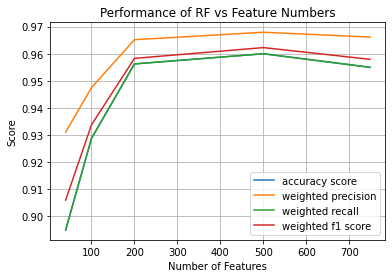

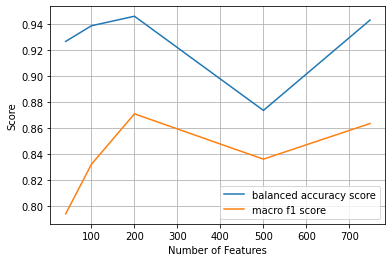

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# plot the feature importance graph for random forest
plt.title('Performance of RF vs Feature Numbers')
plt.xlabel('Number of Features')
plt.ylabel('Score')

eval_path = '/content/drive/MyDrive/nlp_datasets/ATIS dataset/models/evaluation_rf_updated.csv'
eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')

feature_numbers = eval_result['num_features'].to_list()
accuracy_scores = eval_result['accuracy score'].to_list()
balanced_accuracy_scores = eval_result['balanced accuracy score'].to_list()
weighted_precision = eval_result['weighted precision'].to_list()
weighted_recall = eval_result['weighted recall'].to_list()
weighted_f1_scores = eval_result['weighted f1 score'].to_list()
macro_f1_scores = eval_result['macro f1 score'].to_list()

plt.plot(feature_numbers, accuracy_scores, label='accuracy score')
plt.plot(feature_numbers, weighted_precision, label='weighted precision')
plt.plot(feature_numbers, weighted_recall, label='weighted recall')
plt.plot(feature_numbers, weighted_f1_scores, label='weighted f1 score')
plt.legend()
plt.grid()

plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.plot(feature_numbers, balanced_accuracy_scores, label='balanced accuracy score')
plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')

plt.legend()
plt.grid()
plt.show()